# Numerical Methods - Usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Finding Roots

There are two different methods of finding roots; Directly from data or by passing a function into the solver

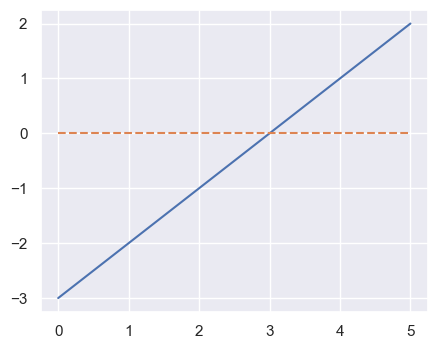

In [2]:
# creating some data
def y_func(xin):
    return xin - 3

x = np.linspace(0, 5, 150)
y = y_func(x)

plt.figure(figsize=(5, 4), dpi=100)
plt.plot(x, y)
plt.plot(x, np.zeros(len(x)), linestyle='--')
plt.show()

Data method:

In [3]:
from find_roots import find_root_data

In [4]:
# finding root with secant method
find_root_data(x, y, 4, method='secant')

3.0

In [5]:
# finding root with bisection method
find_root_data(x, y, [1, 4.5], method='bisection')

2.99993896484375

Function method:

In [6]:
from find_roots import find_root_function

In [7]:
# finding root with secant method
find_root_function(y_func, 4, method='secant')

3.0

In [8]:
# finding root with bisection method
find_root_function(y_func, [1, 4.5], method='bisection')

2.99993896484375

## Solving ODEs (Initial Value Problem)
Basic 4th order Runge-Kutta method:

In [9]:
from solve_ode_ivp import rk_4

In [10]:
dydx = lambda t, y: -2*y

In [11]:
y_out, t_out = rk_4(dydx, y_init=1, t_init=0, t_final=2)

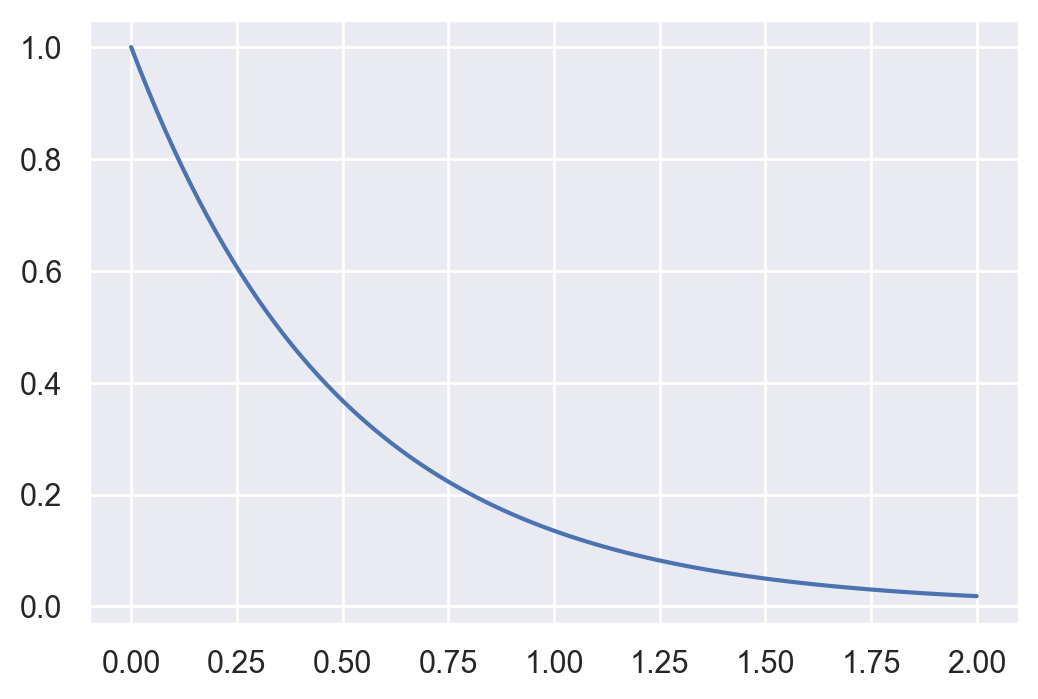

In [12]:
plt.figure(dpi=200)
plt.plot(t_out, y_out)
plt.show()

Runge-Kutta 4(5) method (variable step size):

In [13]:
from solve_ode_ivp import rk_45

In [14]:
y_out_45, t_out_45 = rk_45(dydx, y_init=1, t_init=0, t_final=2, tolerance=0.001, beta=0.8)

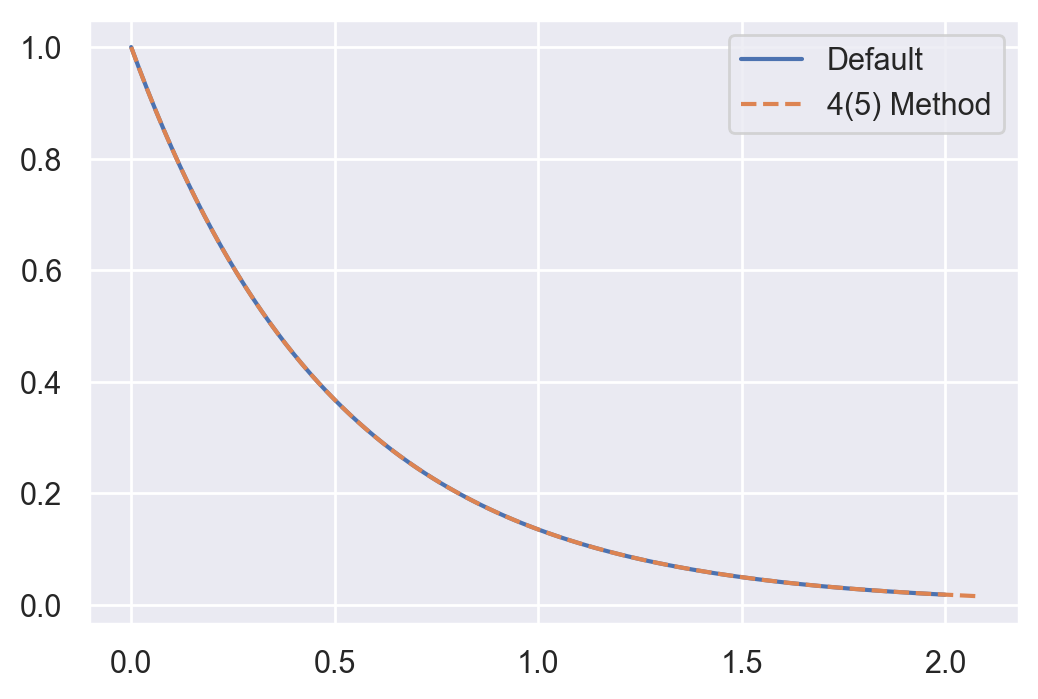

In [15]:
plt.figure(dpi=200)
plt.plot(t_out, y_out, label='Default')
plt.plot(t_out_45, y_out_45, label='4(5) Method', linestyle='--')
plt.legend()
plt.show()

The solvers are also able to solve coupled first-order ODEs (`rk_45()` is finicky and may not work very well without testing different tolerances), e.g., Example 1.20 from Orbital Mechanics for Engineering Students: A spacecraft travels in a straight line away from the center of the earth. If at a distance of 6500 km from the Earth its velocity is 7.8 km/s, determine its position and velocity after 70 min.

Rearranging Newton's Second Law yields:
$$\ddot x = - \frac{g_0 R_E^2}{x^2}$$

This second order ODE can be transformed into two coupled first order ODEs using two auxiliary variables, $y_1 = x$, $y_2 = \dot x$, thus:
$$\dot y_1 = y_2 $$
$$\dot y_2 = - \frac{g_0 R_E^2}{y_1^2}$$


In [16]:
re = 6378e3
g0 = 9.807

y1_0 = 6500e3
y2_0 = 7.8e3

S0 = [y1_0, y2_0]

In [17]:
def dSdx(t, S):
    y1, y2 = S
    return [y2, -1 * (g0 * re**2) / (y1**2)]

In [18]:
s_out, t_out = rk_4(dSdx, y_init=S0, t_init=0, t_final=60*70)
s_out_45, t_out_45 = rk_45(dSdx, y_init=S0, t_init=0, t_final=60*70, tolerance=500)

In [19]:
# comparison of number of points
len(t_out), len(t_out_45)

(101, 2831)

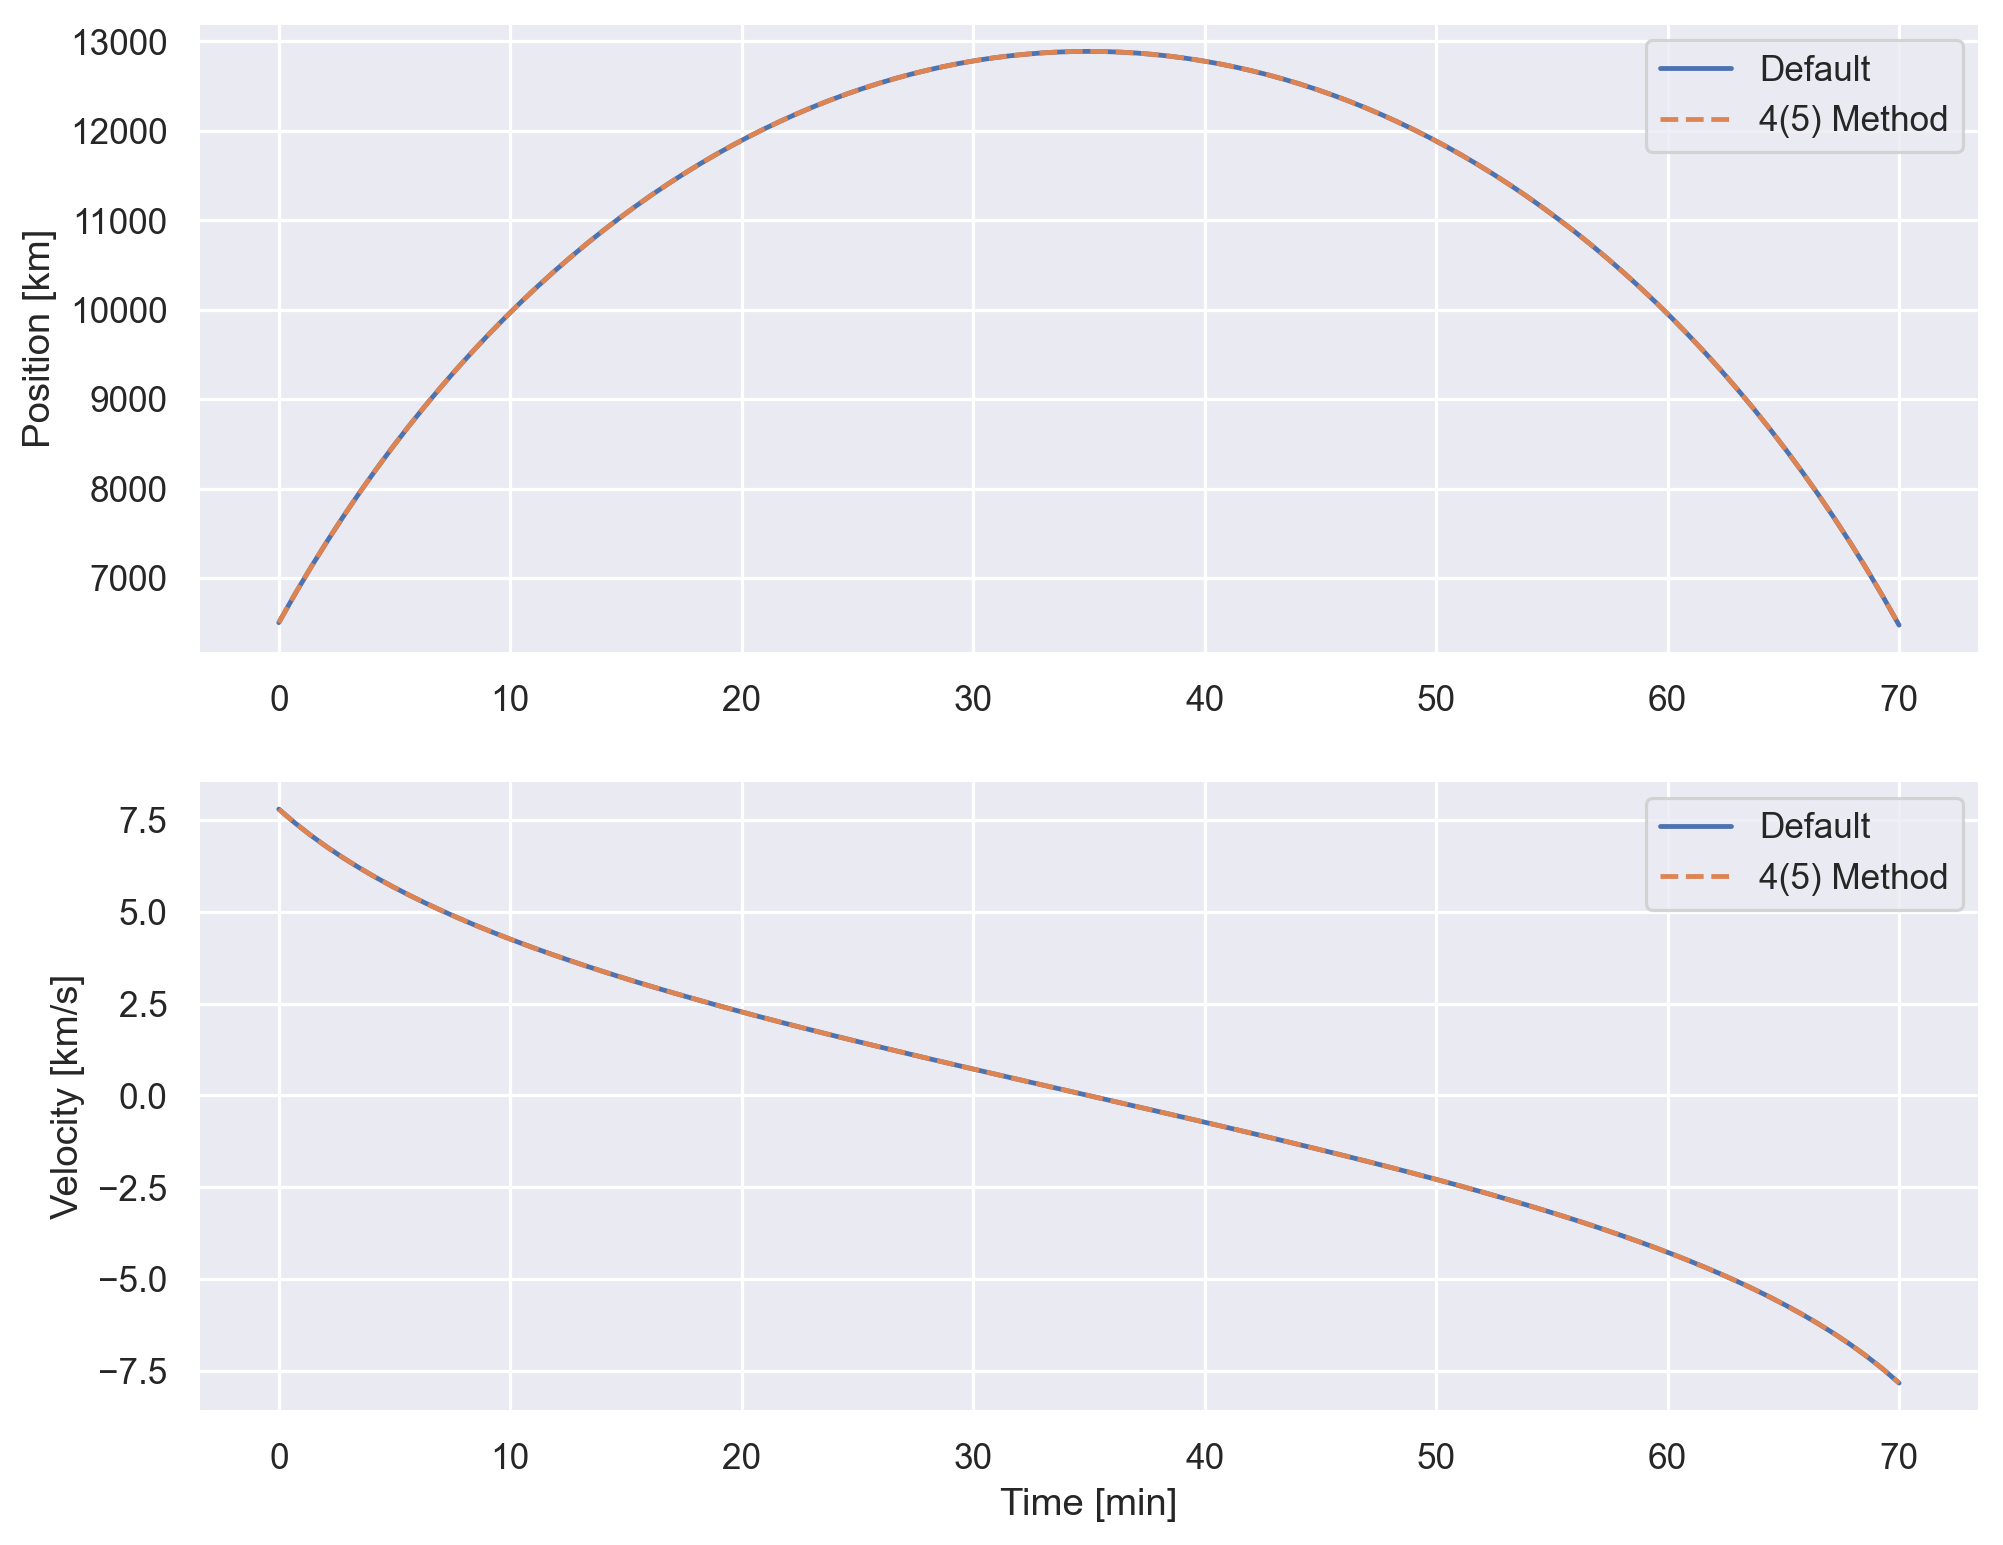

In [20]:
fig, axs = plt.subplots(2, dpi=230, figsize=(10,8))

axs[0].plot(t_out/60, s_out.T[0]/1e3, label='Default')
axs[1].plot(t_out/60, s_out.T[1]/1e3, label='Default')

axs[0].plot(t_out_45/60, s_out_45.T[0]/1e3, label='4(5) Method', linestyle='--')
axs[1].plot(t_out_45/60, s_out_45.T[1]/1e3, label='4(5) Method', linestyle='--')

axs[0].set_ylabel('Position [km]')
axs[1].set_ylabel('Velocity [km/s]')

axs[1].set_xlabel('Time [min]')

axs[0].legend()
axs[1].legend()

plt.show()